<a href="https://colab.research.google.com/github/AjayKumarAryan/Aryanpygit/blob/main/Handwritten_digits_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train[1].shape

(28, 28)

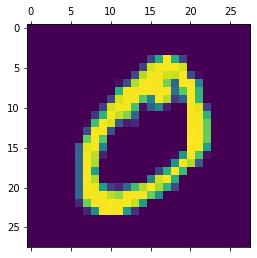

In [ ]:
plt.matshow(X_train[1])

In [ ]:
y_train[1]

0

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

**Using ANN for classification**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2447 - accuracy: 0.9287
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1034 - accuracy: 0.9692
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0728 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0572 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0464 - accuracy: 0.9852


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0834 - accuracy: 0.9761


[0.08342649042606354, 0.9761000275611877]

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

**Using CNN for classification**

In [ ]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(400, activation='relu'),
    layers.Dense(500, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 3ms/step - loss: 0.1725 - accuracy: 0.9478
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0697 - accuracy: 0.9811
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0467 - accuracy: 0.9872
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0365 - accuracy: 0.9900
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0284 - accuracy: 0.9926


In [ ]:
y_train[2:5]

array([4, 1, 9], dtype=uint8)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0610 - accuracy: 0.9849


[0.06101304292678833, 0.9848999977111816]